# Lab: Understanding and Implementing Convolutional Neural Networks (CNNs)

### Definition and Basic Architecture

Convolutional Neural Networks (ConvNets) are a powerful type of deep learning model specifically designed for processing and analyzing visual data, such as images and videos. They have revolutionized the field of Computer Vision, enabling remarkable advancements in tasks like Image Recognition, Object Detection, and Image Segmentation.

The architecture of CNN comprises three fundamental layer types:

- Convolutional Layers

- Pooling Layers

- Fully-Connected Layers

<figure>
  <img style="float: left;" src="../../fig/cnn.png" width="500"/>
</figure>

#### Convolutional layer

The primary aim of convolutional layers in Convolutional Neural Networks (CNNs) is to extract features from input data, particularly images. These layers apply filters (or kernels) to the input, which allows the network to learn and identify patterns such as edges, textures, and more complex structures within the data, and the matrix formed by sliding the filter over the image is called the Convolved Feature, Activation Map, or Feature Map. 

It is primarily governed by the following main hyperparameters:

- Kernel size: It determines the size of the sliding window. It is generally recommended to use smaller window sizes, preferably odd values such as 1, 3, 5.

- Stride: The stride parameter determines the number of pixels the kernel window will move during each step of convolution. Typically, it is set to 1 to ensure that no locations are missed in an image. 

- Padding: Padding refers to the technique of adding zeros to the border of an image. By applying padding, the kernel can fully filter every position of an input image, ensuring that even the edges are properly processed. So its value is set to 0.

- Number of filters /Depth:  determines the number of distinct characteristics or elements that the convolutional layer will focus on detecting.


Let’s take an example to better understand this concept. Imagine we have an input image with dimensions of 6x6 pixels. For the convolutional operation, we use a kernel with dimensions of 3x3 pixels, a stride of 1, and no padding (padding of 0).

To calculate the output size of the convoluted image, we can apply the following formula: 

$$
\text{output\_size} = 1 + \frac{\text{input\_size} - \text{kernel\_size} + (2 \times \text{padding})}{\text{stride}}
$$
Plugging in the values, we get:  $\text{output\_size} = 1 + \frac{6 - 3 + (2 \times 0)}{1} = 4$

**How do you think we can convolve an image when the input has more than one channel (an RGB image)?**

you can learn more here: https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/


#### The Pooling Layer

Pooling layers, also referred to as downsampling, serve to reduce the dimensionality of the input, thereby decreasing the number of parameters. Similar to convolutional layers, pooling operations involve traversing a filter across the input. Two primary types of pooling are commonly employed:

- Max Pooling: It selects the pixel with the maximum value to send to the output array.

- Average pooling: It calculates the average value within the receptive field to send to the output array.

#### Fully-Connected Layer

The Fully Connected Layer or dense layer aims to provide global connectivity between all neurons in the layer. Unlike convolutional and pooling layers, which operate on local spatial regions, the fully connected layer connects every neuron to every neuron in the previous and subsequent layers.

This combination of convolution, pooling, and fully connected layers forms the core structure of a CNN and enables it to learn and recognize complex patterns in images or other data.

<figure>
  <img style="float: left;" src="../../fig/fully.png" width="700"/>
</figure>



#### Implementation

We will build a CNN to classify images from the MNIST dataset (handwritten digits, 0–9).

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (required for CNNs)
# CNNs expect the input image data to be in a specific format that includes 
# a channel dimension, even for grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



11490434/11490434 [==============================] - 8s 1us/step


In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
x_test.shape

(10000, 28, 28, 1)

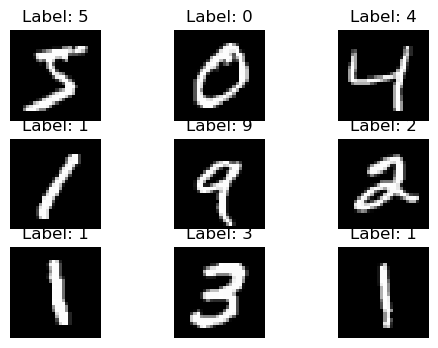

In [6]:
# Display a few training images
plt.figure(figsize=(6, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Label: {y_train[i].argmax()}')
    plt.axis('off')
plt.show()


In [7]:
# Define the CNN architecture
model = models.Sequential([
    # Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    # Add another Conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    
    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

